In [213]:
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [214]:
data = pd.read_csv("ab_browser_test.csv")
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [215]:
data.shape

(566134, 6)

### 1 задание

In [216]:
data_exp = data.loc[data.slot == 'exp']
data_control = data.loc[data.slot == 'control']

In [217]:
data_exp.shape, data_control.shape

((281580, 6), (284554, 6))

In [218]:
clicks_sum_exp = data_exp.n_clicks.sum()
clicks_sum_control = data_control.n_clicks.sum()

In [219]:
round((clicks_sum_exp-clicks_sum_control)/clicks_sum_control*100,3)

1.614

### 2 задание

In [220]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [221]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [222]:
n = 1000
clicks_exp_median = list(map(np.median, get_bootstrap_samples(data_exp.n_clicks.values, n)))
clicks_control_median = list(map(np.median, get_bootstrap_samples(data_control.n_clicks.values, n)))

In [223]:
clicks_exp_intrvl = stat_intervals(clicks_exp_median, 0.05)
clicks_control_intrvl = stat_intervals(clicks_control_median, 0.05)

In [224]:
print(f'Интервальная оценка медианы: {clicks_exp_intrvl}')
print(f'Интервальная оценка медианы: {clicks_control_intrvl}')

Интервальная оценка медианы: [5. 5.]
Интервальная оценка медианы: [4. 4.]


In [225]:
delta_median_scores = list(map(lambda x: x[1] - x[0], zip(clicks_exp_intrvl, clicks_control_intrvl)))
delta_median_scores

[-1.0, -1.0]

In [226]:
n = 1000
clicks_exp_mean = list(map(np.mean, get_bootstrap_samples(data_exp.n_clicks.values, n)))
clicks_control_mean = list(map(np.mean, get_bootstrap_samples(data_control.n_clicks.values, n)))

In [227]:
clicks_exp_intrvl_mean = stat_intervals(clicks_exp_mean, 0.05)
clicks_control_intrvl_mean = stat_intervals(clicks_control_mean, 0.05)

In [228]:
print(f'Интервальная оценка медианы: {clicks_exp_intrvl_mean}')
print(f'Интервальная оценка медианы: {clicks_control_intrvl_mean}')

Интервальная оценка медианы: [11.51455998 11.66433296]
Интервальная оценка медианы: [11.21155457 11.35115435]


In [229]:
delta_mean_scores = list(map(lambda x: x[1] - x[0], zip(clicks_exp_intrvl_mean,
                                                        clicks_control_intrvl_mean)))
delta_mean_scores

[-0.3030054098318864, -0.31317861012089665]

### 3 задание

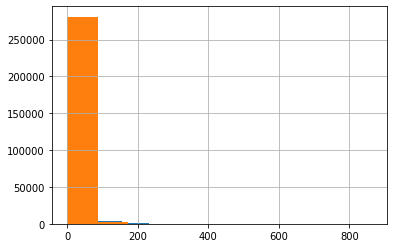

In [230]:
data_exp.n_clicks.hist()
data_control.n_clicks.hist()

In [231]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [232]:
np.random.seed(0)
n_boot_samples = 500

ctrl_bootstrap_mean = list(map(np.mean, get_bootstrap_samples(data_control.n_clicks.values,
                                                         n_boot_samples)))

ctrl_bootstrap_std = list(map(np.std, get_bootstrap_samples(data_control.n_clicks.values,
                                                         n_boot_samples)))

In [233]:
import scipy.stats as stats

0.9979748364604202

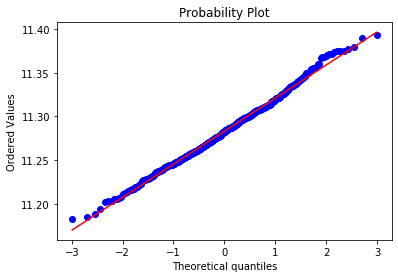

In [234]:
stats.probplot(ctrl_bootstrap_mean, dist="norm", plot = plt)[1][2]

In [235]:
n = len(ctrl_bootstrap_std)

(0.005141548314832189, 17.721573429489954, 0.9984052922206964)

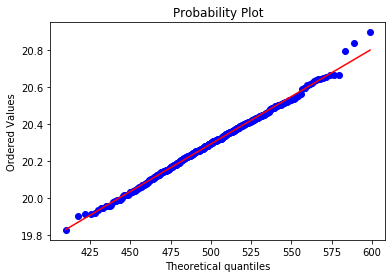

In [236]:
stats.probplot(ctrl_bootstrap_std, dist="chi2", 
                     sparams=(n-1),  plot = plt)[1]

### 5 задание

In [237]:
data_exp = data.loc[data.slot == 'exp']
data_control = data.loc[data.slot == 'control']

In [238]:
data_exp.columns

Index(['userID', 'browser', 'slot', 'n_clicks', 'n_queries',
       'n_nonclk_queries'],
      dtype='object')

In [239]:
id_clicks_exp = data_exp[['userID', 'n_clicks']].groupby('userID').sum()

In [240]:
id_clicks_exp.index.duplicated().any()

False

In [241]:
id_clicks_control = data_control[['userID', 'n_clicks']].groupby('userID').sum()

In [242]:
stats.mannwhitneyu(id_clicks_exp['n_clicks'], id_clicks_control['n_clicks'])

MannwhitneyuResult(statistic=38901259929.0, pvalue=4.3471471887604393e-75)

### 6 задание

In [243]:
#browser_clicks_exp = data_exp[['n_clicks', 'browser']].groupby('browser').sum()
#browser_clicks_control = data_control[['n_clicks', 'browser']].groupby('browser').sum()

In [244]:
browsers = list(data_exp.browser.unique())

In [246]:
p_data = []

for browsr in browsers:
    p = stats.mannwhitneyu(data_exp.loc[data_exp.browser == browsr, 'n_clicks'],
                           data_control.loc[data_control.browser == browsr, 'n_clicks'])[1]
    p_data.append([browsr, p])

In [247]:
p_df = pd.DataFrame.from_records(p_data)
p_df.columns = ['browser', 'p']

In [248]:
from statsmodels.sandbox.stats.multicomp import multipletests 

In [249]:
reject, p_corrected, a1, a2 = multipletests(p_df.p, 
                                            alpha = 0.05/len(browsers), 
                                            method = 'holm') 

In [253]:
(p_corrected >= 0.05/len(browsers)).sum()

5

In [252]:
p_corrected

array([0.1362193 , 0.81521235, 0.        , 0.14960241, 0.81521235,
       0.77221655])

### 7 задание

In [187]:
data_exp.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
4,7,Browser #4,exp,54,68,30
6,9,Browser #4,exp,6,3,1


In [195]:
kek = []

for browsr in browsers:
    share_exp = data_exp.loc[data_exp.browser == browsr, 'n_nonclk_queries'].sum()/\
                data_exp.loc[data_exp.browser == browsr, 'n_queries'].sum()
    share_control = data_control.loc[data_control.browser == browsr, 'n_nonclk_queries'].sum()/\
                data_control.loc[data_control.browser == browsr, 'n_queries'].sum()
    kek.append([browsr, share_exp, share_control])

In [196]:
kek_df = pd.DataFrame.from_records(kek)
kek_df.columns = ['browser', 'share_exp', 'share_control']
kek_df

,browser,share_exp,share_control
0,Browser #2,0.449827,0.459627
1,Browser #4,0.451429,0.469709
2,Browser #14,0.437556,0.575904
3,Browser #17,0.369374,0.362994
4,Browser #20,0.389774,0.405405
5,Browser #22,0.398539,0.405940
